
Hasil Penilaian Kelayakan Kredit:
Pendapatan: 6000
Utang: 3000
Riwayat Kredit: 500
Tidak Layak (Not Eligible): 0.50
Layak (Eligible): 0.36
Nilai Akhir Kelayakan Kredit (Defuzzifikasi): 0.46


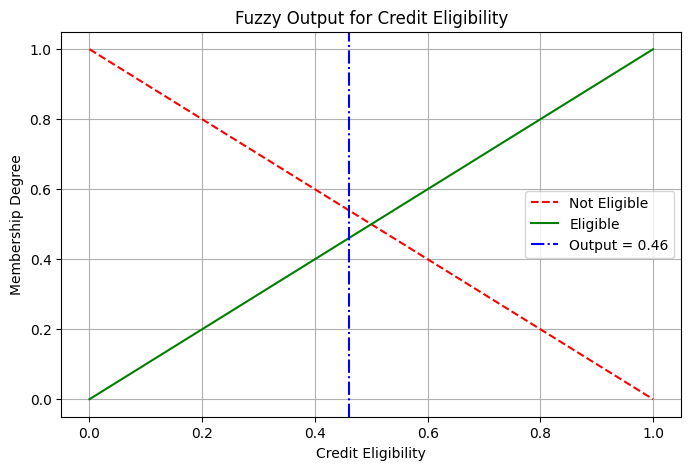

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define Fuzzy Logic classes
class Fuzzy:
    def __init__(self):
        self.min = 0
        self.max = 0

    def down(self, x):
        return max(0, (self.max - x) / (self.max - self.min))

    def up(self, x):
        return max(0, (x - self.min) / (self.max - self.min))

# Define fuzzy variables
class Income(Fuzzy):
    def __init__(self):
        self.min = 2000
        self.max = 10000

    def low(self, x):
        if x <= self.min:
            return 1
        elif x >= self.max:
            return 0
        return self.down(x)

    def high(self, x):
        if x <= self.min:
            return 0
        elif x >= self.max:
            return 1
        return self.up(x)

class Debt(Fuzzy):
    def __init__(self):
        self.min = 1000
        self.max = 5000

    def low(self, x):
        if x <= self.min:
            return 1
        elif x >= self.max:
            return 0
        return self.down(x)

    def high(self, x):
        if x <= self.min:
            return 0
        elif x >= self.max:
            return 1
        return self.up(x)

class CreditHistory(Fuzzy):
    def __init__(self):
        self.min = 300
        self.max = 850

    def poor(self, x):
        if x <= self.min:
            return 1
        elif x >= self.max:
            return 0
        return self.down(x)

    def good(self, x):
        if x <= self.min:
            return 0
        elif x >= self.max:
            return 1
        return self.up(x)

class CreditEligibility(Fuzzy):
    def __init__(self):
        self.min = 0
        self.max = 1

# Define fuzzy rules and defuzzification
class CreditSystem:
    def __init__(self):
        self.income = Income()
        self.debt = Debt()
        self.credit_history = CreditHistory()
        self.credit_eligibility = CreditEligibility()

    def evaluate(self, income_value, debt_value, credit_history_value):
        # Calculate membership values
        income_low = self.income.low(income_value)
        income_high = self.income.high(income_value)

        debt_low = self.debt.low(debt_value)
        debt_high = self.debt.high(debt_value)

        credit_poor = self.credit_history.poor(credit_history_value)
        credit_good = self.credit_history.good(credit_history_value)

        # Apply fuzzy rules
        not_eligible_1 = min(income_low, debt_high, credit_poor)
        eligible_1 = min(income_high, debt_low, credit_good)
        eligible_2 = min(income_low, debt_low, credit_good)

        # Aggregate outputs
        not_eligible = not_eligible_1
        eligible = max(eligible_1, eligible_2)

        # Defuzzification using Centroid Method
        defuzzified_value = (not_eligible * 0.25 + eligible * 0.75) / (not_eligible + eligible)

        return defuzzified_value, not_eligible, eligible

# Instantiate the system
credit_system = CreditSystem()

# Input values
income_value = 6000  # Example: income = 6000

debt_value = 3000    # Example: debt = 3000

credit_history_value = 500  # Example: credit history = 500

# Evaluate the system
output, not_eligible, eligible = credit_system.evaluate(income_value, debt_value, credit_history_value)

# Display results
print("\nHasil Penilaian Kelayakan Kredit:")
print(f"Pendapatan: {income_value}")
print(f"Utang: {debt_value}")
print(f"Riwayat Kredit: {credit_history_value}")
print(f"Tidak Layak (Not Eligible): {not_eligible:.2f}")
print(f"Layak (Eligible): {eligible:.2f}")
print(f"Nilai Akhir Kelayakan Kredit (Defuzzifikasi): {output:.2f}")

# Visualize the result
x = np.linspace(0, 1, 100)
not_eligible_curve = [max(0, 1 - xi) for xi in x]
eligible_curve = [max(0, xi) for xi in x]

plt.figure(figsize=(8, 5))
plt.plot(x, not_eligible_curve, label="Not Eligible", color="red", linestyle="--")
plt.plot(x, eligible_curve, label="Eligible", color="green", linestyle="-")
plt.axvline(output, color="blue", linestyle="-.", label=f"Output = {output:.2f}")
plt.title("Fuzzy Output for Credit Eligibility")
plt.xlabel("Credit Eligibility")
plt.ylabel("Membership Degree")
plt.legend()
plt.grid()
plt.show()


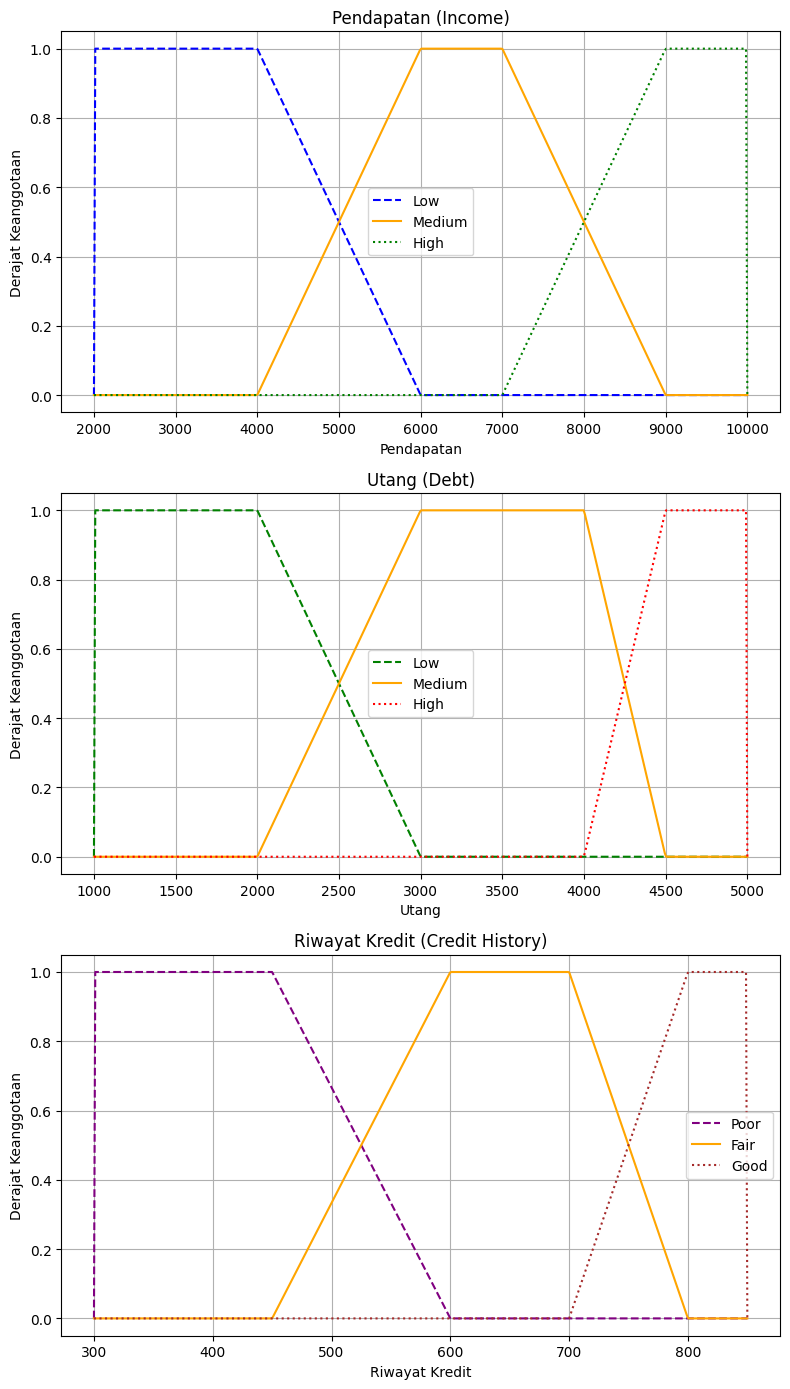

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define Fuzzy Logic classes
class Fuzzy:
    def __init__(self):
        self.min = 0
        self.max = 0

    def down(self, x):
        return max(0, (self.max - x) / (self.max - self.min))

    def up(self, x):
        return max(0, (x - self.min) / (self.max - self.min))

    def trapezoid(self, x, a, b, c, d):
        if x <= a or x >= d:
            return 0
        elif a < x <= b:
            return (x - a) / (b - a)
        elif b < x <= c:
            return 1
        elif c < x < d:
            return (d - x) / (d - c)

# Define the fuzzy variables
class Income(Fuzzy):
    def __init__(self):
        self.min = 2000
        self.max = 10000

    def low(self, x):
        return self.trapezoid(x, self.min, self.min, 4000, 6000)

    def medium(self, x):
        return self.trapezoid(x, 4000, 6000, 7000, 9000)

    def high(self, x):
        return self.trapezoid(x, 7000, 9000, self.max, self.max)

class Debt(Fuzzy):
    def __init__(self):
        self.min = 1000
        self.max = 5000

    def low(self, x):
        return self.trapezoid(x, self.min, self.min, 2000, 3000)

    def medium(self, x):
        return self.trapezoid(x, 2000, 3000, 4000, 4500)

    def high(self, x):
        return self.trapezoid(x, 4000, 4500, self.max, self.max)

class CreditHistory(Fuzzy):
    def __init__(self):
        self.min = 300
        self.max = 850

    def poor(self, x):
        return self.trapezoid(x, self.min, self.min, 450, 600)

    def fair(self, x):
        return self.trapezoid(x, 450, 600, 700, 800)

    def good(self, x):
        return self.trapezoid(x, 700, 800, self.max, self.max)

# Instantiate fuzzy sets
income = Income()
debt = Debt()
credit_history = CreditHistory()

# Define the ranges for each variable
x_income = np.linspace(2000, 10000, 500)
x_debt = np.linspace(1000, 5000, 500)
x_credit_history = np.linspace(300, 850, 500)

# Calculate fuzzy membership values
income_low = [income.low(x) for x in x_income]
income_medium = [income.medium(x) for x in x_income]
income_high = [income.high(x) for x in x_income]

debt_low = [debt.low(x) for x in x_debt]
debt_medium = [debt.medium(x) for x in x_debt]
debt_high = [debt.high(x) for x in x_debt]

credit_poor = [credit_history.poor(x) for x in x_credit_history]
credit_fair = [credit_history.fair(x) for x in x_credit_history]
credit_good = [credit_history.good(x) for x in x_credit_history]

# Create subplots for the variables
fig, axs = plt.subplots(3, 1, figsize=(8, 14))

# Income Plot
axs[0].plot(x_income, income_low, label="Low", color="blue", linestyle="--")
axs[0].plot(x_income, income_medium, label="Medium", color="orange", linestyle="-")
axs[0].plot(x_income, income_high, label="High", color="green", linestyle=":")
axs[0].set_title("Pendapatan (Income)")
axs[0].legend(loc="best")
axs[0].grid(True)
axs[0].set_xlabel("Pendapatan")
axs[0].set_ylabel("Derajat Keanggotaan")

# Debt Plot
axs[1].plot(x_debt, debt_low, label="Low", color="green", linestyle="--")
axs[1].plot(x_debt, debt_medium, label="Medium", color="orange", linestyle="-")
axs[1].plot(x_debt, debt_high, label="High", color="red", linestyle=":")
axs[1].set_title("Utang (Debt)")
axs[1].legend(loc="best")
axs[1].grid(True)
axs[1].set_xlabel("Utang")
axs[1].set_ylabel("Derajat Keanggotaan")

# Credit History Plot
axs[2].plot(x_credit_history, credit_poor, label="Poor", color="purple", linestyle="--")
axs[2].plot(x_credit_history, credit_fair, label="Fair", color="orange", linestyle="-")
axs[2].plot(x_credit_history, credit_good, label="Good", color="brown", linestyle=":")
axs[2].set_title("Riwayat Kredit (Credit History)")
axs[2].legend(loc="best")
axs[2].grid(True)
axs[2].set_xlabel("Riwayat Kredit")
axs[2].set_ylabel("Derajat Keanggotaan")

# Display the plots
plt.tight_layout()
plt.show()
